<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/project2/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** INTRODUCTION**

1. Data Dictionary: https://byui-cse.github.io/cse450-course/module-03/housing-dictionary.txt
2. Problem Intro: https://byui-cse.github.io/cse450-course/module-03/intro.html
3. Dataset https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv

-You’re working as a data analyst for Reddic Housing LLC, a company that specializes in providing house price estimates to development firms.

Recently, a rival company (Grenic Housing Inc) announced that they were launching a set of initiatives to use Artificial Intelligence and Machine Learning to bring their housing estimates into the twenty-first century.

After a heated shareholders meeting, the board of directors has tasked the CEO with making sure Reddic Housing LLC isn’t left behind.

# Discussions Questions


https://byui-cse.github.io/cse450-course/module-03/discussion.html

Questions
You're about to go into a strategy meeting with the CEO, Vice President of Human Resources, and Vice President of Finance. They want to make sure you have the data required to answer the questions they're most interested in.

Be prepared to answer the following questions:

- **PROBLEM TYPE**

DEVON, THE CEO SAYS:
I just sat through four hours of machine learning training with the board of directors this past week, so I'm curious to get your take on this.

Looking at the data and our business model, what kind of machine learning problem do you think we're looking at here?

- **MODEL CONFIDENCE**

CECIL, THE VP OF CUSTOMER RELATIONS ASKS:
My biggest concern right now is making sure that whatever method we come up with to predict housing prices, we can also attach some kind of empirical confidence metric.

Based on your initial analysis of the data, your team feels you can best show confidence in your model by using:

The sum of squares error (SSE).
The mean squared error (MSE).
The root mean squared error (RMSE).
The 2R value.

- **INSURANCE QUESTION**

WILLIAM, THE VP OF FINANCE ASKS:
Our insurance customers are particularly interested in making sure that homes in… unsavory neighborhoods, aren't estimated high.

Is there a way we can easily identify properties in low income areas and have the model lower those estimates to protect our insurance customers' interests?

Based on your initial analysis of the data, your team feels:

We can lower the predicted price for specific neighborhoods before training the model.
We can add average income or other demographic information for the area as features.
For specific zip codes we could add a step to our pipeline that reduces the predicted price by a specific percentage prior to outputting the final price result to ensure the properties aren’t being overvalued.
Taking this kind of action would be a violation of federal laws and/or ethics.

- **DATA ANALYSIS**

JOHNNY, THE DATA SCIENCE INTERN ASKS:
The head of data science says we should use gradient boosted trees for this analysis.

I've noticed that a lot of the features use pretty different ranges.

For example, how should we handle square footage?

# Project Requirements




Overview
After a few more meetings with the executive team, the head of the data science division has assigned your team to address the following issues asked by the stakeholders:


CECIL, THE VP OF CUSTOMER RELATIONS SAYS:
The biggest thing I want to see is quantifiable evidence that the predictions we come up with are reliable.


WILLIAM, THE VP OF FINANCE ASKS:
I'd like to know which property types are weighing most heavily in the house prices predicted by your model. My excel spreadsheets can tell me that information for our current methodology...can your so-called artificial intelligence do the same?


DEVON, THE CEO ADDS:
Yes...thank you William. These are all great questions.

One other question the board was wondering about, is if there are additional factors about these areas that might be affecting prices, which we aren't taking into account.

That may be a little above and beyond what you're team is planning, since it would require finding more data from an external source and correlating it with the data we already have, but if you have the time, I know they'd appreciate it.

If you could send us your team's write up on this by Saturday night, that would be great.


CECIL, THE VP OF CUSTOMER RELATIONS SAYS:
Oh, one more thing. We actually just received a batch of new home data. Could you run your model on it to make some predictions for us? We are anxious to see your model in action.

You can access the data here: https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv

Then, please include with your write up a csv file that has a single column, with the header: "price" and a prediction (one per row) for each of the homes in this file.

TEAM PROJECT EXPECTATIONS

Be sure to read over the Team Project Expectations guide to know what the expectations are for this and future projects.

# Libraries- Dataset

In [1]:
#!pip install ydata_profiling # data Table Analysis
#!pip install typing_extensions # data Table Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for graphs
from sklearn.model_selection import train_test_split #Model Split to train
from sklearn.metrics import accuracy_score           #Accuracy model
from sklearn.metrics import mean_absolute_error      #evaluation
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score # evaluation cross valida
from sklearn.model_selection import RepeatedKFold # evaluation repeat Xboost
from numpy import absolute
from sklearn.ensemble import RandomForestRegressor # ramdomforest

dfh = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# Table Description

In [2]:
pd.set_option('display.max_columns', None)
dfh.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,8,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,7,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,7,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,8,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,7,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [3]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [4]:
dfh.describe(include='all')

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580297e+09,NaN,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,7.657700,1790.232900,289.650200,1971.100150,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05
std,2.875295e+09,NaN,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,1.175287,829.587101,441.537072,29.374008,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05
min,1.000102e+06,NaN,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04
25%,2.123049e+09,NaN,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.750000,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05
50%,3.904955e+09,NaN,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05
75%,7.309825e+09,NaN,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05


In [5]:

#nun values
nan_count = dfh.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


<ipython-input-6-ae207db36a86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = dfh.corr()


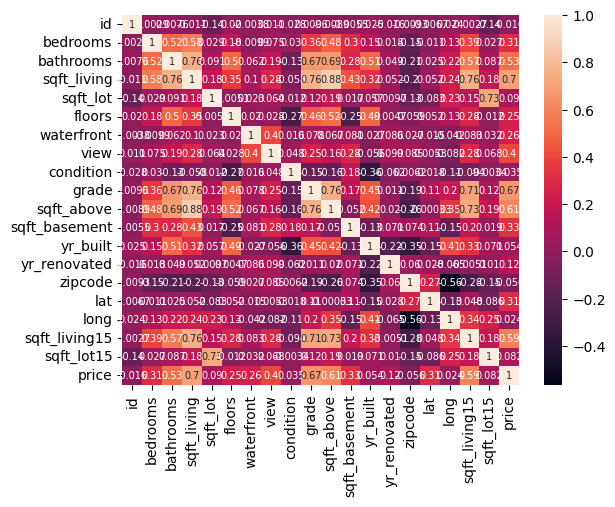

<Figure size 2000x1000 with 0 Axes>

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.002949,0.007555,-0.010707,-0.135118,0.019892,-0.003784,0.011134,-0.027819,0.009608,-0.008933,-0.005513,0.024605,-0.015734,-0.009265,-0.006675,0.023886,-0.002679,-0.139563,-0.016081
bedrooms,0.002949,1.000000,0.515308,0.575836,0.028775,0.175538,-0.009855,0.075328,0.029843,0.355924,0.477414,0.302096,0.153238,0.017524,-0.152812,-0.011395,0.128926,0.389107,0.027150,0.307281
bathrooms,0.007555,0.515308,1.000000,0.755067,0.090815,0.502282,0.061707,0.185383,-0.125687,0.665404,0.686492,0.282488,0.505910,0.048749,-0.206076,0.025438,0.223845,0.567161,0.087461,0.527989
sqft_living,-0.010707,0.575836,0.755067,1.000000,0.179149,0.352298,0.099665,0.281090,-0.058205,0.762798,0.877494,0.433657,0.317353,0.052084,-0.203152,0.051621,0.240743,0.755154,0.184098,0.703920
sqft_lot,-0.135118,0.028775,0.090815,0.179149,1.000000,-0.005131,0.023271,0.064313,-0.011743,0.117500,0.189269,0.017441,0.057324,0.009704,-0.133597,-0.082571,0.230914,0.147500,0.729823,0.090317
floors,0.019892,0.175538,0.502282,0.352298,-0.005131,1.000000,0.019793,0.027956,-0.265709,0.458536,0.521155,-0.245572,0.491608,0.004686,-0.058702,0.051880,0.126800,0.277232,-0.012007,0.254428
waterfront,-0.003784,-0.009855,0.061707,0.099665,0.023271,0.019793,1.000000,0.400691,0.016069,0.078484,0.067151,0.081369,-0.027356,0.085762,0.026911,-0.014923,-0.041975,0.082817,0.032331,0.260133
view,0.011134,0.075328,0.185383,0.281090,0.064313,0.027956,0.400691,1.000000,0.047982,0.247897,0.164625,0.276019,-0.055731,0.099229,0.085359,0.005275,-0.081705,0.279627,0.068113,0.395961
condition,-0.027819,0.029843,-0.125687,-0.058205,-0.011743,-0.265709,0.016069,0.047982,1.000000,-0.145354,-0.157919,0.175505,-0.361241,-0.061881,0.006210,-0.017745,-0.109467,-0.094067,-0.003359,0.035146
grade,0.009608,0.355924,0.665404,0.762798,0.117500,0.458536,0.078484,0.247897,-0.145354,1.000000,0.756687,0.166700,0.448200,0.010600,-0.187763,0.114822,0.199705,0.712524,0.119812,0.666447


In [6]:

corrMatrix = dfh.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

# Data Wrangling - Missing Values, transformation

In [7]:
from datetime import date
dfh['date']=  pd.to_datetime(dfh['date'])

In [8]:
dfh.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,2014-11-04,4,3.25,3760,4675,2.0,0,0,3,8,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,2015-01-15,3,1.75,1460,7800,1.0,0,0,2,7,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,2014-10-14,4,1.00,1340,5800,1.5,0,2,3,7,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,2014-12-08,3,1.75,1440,8050,1.0,0,0,3,8,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,2014-08-15,2,1.50,1780,4750,1.0,0,0,4,7,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


# Data Analysis

Text(0.5, 1.0, 'Price')

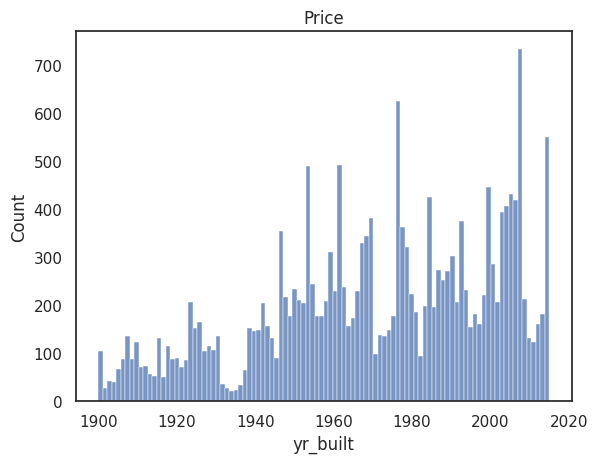

In [9]:

sns.set()
sns.set_style('white')
graph1=sns.histplot(data=dfh, x='yr_built', bins=100)#hue='species'
graph1.set_title("Price")


<ipython-input-10-cdbbaeea7d40>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)


[Text(0, 0, '1.0'),
 Text(1, 0, '1.5'),
 Text(2, 0, '2.0'),
 Text(3, 0, '2.5'),
 Text(4, 0, '3.0'),
 Text(5, 0, '3.5')]

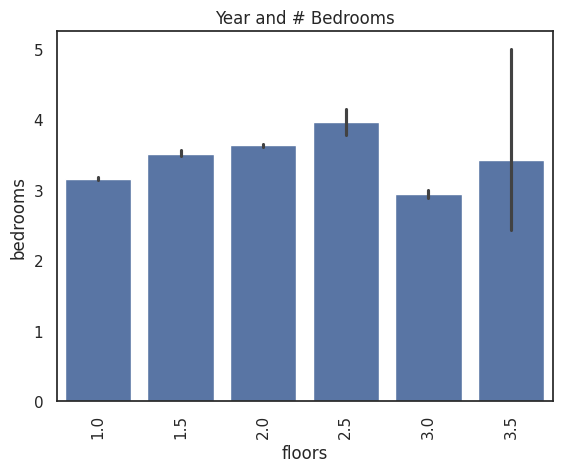

In [10]:
graph2=sns.barplot(data=dfh,x='floors', y='bedrooms')
graph2.set_title('Year and # Bedrooms')
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)


# Machine Learning Model

## Split Date

In [11]:
dfh.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [12]:
X = dfh[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [13]:
y=dfh['price']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.3, random_state=1)

In [15]:
y_train = y_train.astype(float)

## Standarization

## Training Model 1

In [16]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 11408 to 235
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14000 non-null  int64  
 1   bathrooms      14000 non-null  float64
 2   sqft_living    14000 non-null  int64  
 3   sqft_lot       14000 non-null  int64  
 4   floors         14000 non-null  float64
 5   waterfront     14000 non-null  int64  
 6   view           14000 non-null  int64  
 7   condition      14000 non-null  int64  
 8   grade          14000 non-null  int64  
 9   sqft_above     14000 non-null  int64  
 10  sqft_basement  14000 non-null  int64  
 11  yr_built       14000 non-null  int64  
 12  yr_renovated   14000 non-null  int64  
 13  zipcode        14000 non-null  int64  
 14  lat            14000 non-null  float64
 15  long           14000 non-null  float64
 16  sqft_living15  14000 non-null  int64  
 17  sqft_lot15     14000 non-null  int64  
dtypes: f

In [18]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

## Resample

## Prediction

In [19]:
y_pred=xg.predict(X_test)

## Evaluation

In [20]:
mse=mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
print(f"RMSE: {rmse:,.2f}")
print(f"MSE: {mse:,.2f}")

RMSE: 127,233.34
MSE: 16,188,323,818.28


In [21]:
scores= cross_val_score(xg,X_test,y_test,
  scoring= 'neg_mean_squared_error', cv=10)

In [22]:
rmse= np.sqrt(-scores)

In [23]:
print('Reg rmse:',np.round(rmse,2))
print('RMSE mean: %0.2f'%
      (rmse.mean()))

Reg rmse: [138581.54 113182.8  157298.23 104566.69 154971.95 119918.04 127059.74
 147667.57 136381.51 217731.63]
RMSE mean: 141735.97


In [24]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xg, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 73082.659 (4581.978)


## Training Model 2

In [25]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [26]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [27]:
y_pred_random=rf.predict(X_test)

In [28]:
mse2=mean_squared_error(y_test,y_pred_random)
rmse2= np.sqrt(mse2)
print(f"RMSE: {rmse2:,.2f}")
print(f"MSE: {mse2:,.2f}")

RMSE: 182,139.87
MSE: 33,174,930,599.19


# Applying Model

In [29]:
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             81 non-null     int64  
 1   date           81 non-null     object 
 2   bedrooms       81 non-null     int64  
 3   bathrooms      81 non-null     float64
 4   sqft_living    81 non-null     int64  
 5   sqft_lot       81 non-null     int64  
 6   floors         81 non-null     float64
 7   waterfront     81 non-null     int64  
 8   view           81 non-null     int64  
 9   condition      81 non-null     int64  
 10  grade          81 non-null     int64  
 11  sqft_above     81 non-null     int64  
 12  sqft_basement  81 non-null     int64  
 13  yr_built       81 non-null     int64  
 14  yr_renovated   81 non-null     int64  
 15  zipcode        81 non-null     int64  
 16  lat            81 non-null     float64
 17  long           81 non-null     float64
 18  sqft_living1

In [30]:
X_use = dfh[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y_use =dfh['price']

In [31]:
y_use = y_use.astype(float)

In [32]:
y_use_prediction=xg.predict(X_use)

In [33]:

# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'Prediction': y_use_prediction})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module2-predictions.csv', index=False)
